
# Image Augmentation
## Loading the packages

In [1]:
from glob import glob
import os 
import numpy as np 
import matplotlib.pyplot as plt 
from cv2 import imread
from tqdm import tqdm
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from cv2 import imread, resize, INTER_AREA, cvtColor, applyColorMap, COLOR_BGR2RGB

Using TensorFlow backend.


## Custom functions

In [0]:
def load_dataset(path):
    """
    Reads in the path of each images belonging to the different 
    datasets and then it assignes the correspoinding labels to them. 
    
    Returns 2 numpy arrays one containing file paths to images, 
    and one containing onehot-encoded classification labels.
    """
    # NORMAL 
    files_normal = glob(os.path.join(path, "NORMAL", "*.jpeg"))
    size_normal = len(files_normal)
    label_normal = [0] * size_normal
    
    # PNEUMONIA
    files_pneumonia = glob(os.path.join(path, "PNEUMONIA", "*.jpeg"))
    size_pneumonia = len(files_pneumonia)
    label_pneumonia = [1] * size_pneumonia

    # merge each label + file from the categories into one array
    labels = np.array(label_normal + label_pneumonia)
    files = np.array(files_normal + files_pneumonia)
    
    return files, labels



def cmap(cmap_name):
    """
    Extracts a matplotlib colormap color 
    information as a LUT compatible with cv2.applyColormap().
    
    Returns a colormap. 
    """
    c_map = cm.get_cmap(cmap_name, 256)
    rgba_data = cm.ScalarMappable(cmap=c_map).to_rgba(np.arange(0, 1.0, 1.0 / 256.0), bytes=True)
    rgba_data = rgba_data[:, 0:-1].reshape((256, 1, 3))

    # Convert to BGR, uint8, for OpenCV.
    cmap = np.zeros((256, 1, 3), np.uint8)
    cmap[:, :, :] = rgba_data[:, :, ::-1]

    return cmap


def path_to_tensor(img_path):
    """
    Colorize the image after reading it in 
    from the given path and then it makes a 4D tensor from it. 
    
    Returns the 4D tensors of the colorized image. 
    """ 
    dim = (width, height)
    img_gray = imread(img_path)
    img_resized = resize(img_gray, dim, interpolation = INTER_AREA)
    img_color =  cvtColor(applyColorMap(img_resized, cmap('terrain')),COLOR_BGR2RGB)
    # convert 3D tensor to 4D tensor with shape (1, 150, 150, 3) 
    return np.expand_dims(img_color, axis=0)

def paths_to_tensor(img_paths):
    """
    Makes a list of tensors from the 4D tensors 
    we created in the previous step. 
    
    Returns a list of 4D tensors of colorized images. 
    """
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)           


"                     \n#ImageFile.LOAD_TRUNCATED_IMAGES = True                 \n\n# pre-process the data for Keras\n#train_tensors = paths_to_tensor(train_files).astype('float32')/255\nvalid_tensors = paths_to_tensor(valid_files).astype('float32')/255\n#test_tensors = paths_to_tensor(test_files).astype('float32')/255\n\n#train_targets = to_categorical(train_target,2)\n#test_targets = to_categorical(test_target,2)\nvalid_targets = to_categorical(valid_target,2)\n\n\nprint('There are %d images in the validation set.'% len(valid_tensors))\n\n"

## Reading in the dataset 

In [0]:
img_height, img_width  = 150, 150
dim = (width, height)

# paths to different datasets 
valid_path =  os.path.abspath(os.path.join('chest_xray', 'val'))

# reading in the dataset
valid_files, valid_target  = load_dataset(valid_path)


## Image Augmentation 

Rather than generating and saving such images to hard disk, we will generate them on the fly during training. This can be done directly using built-in functionality of keras.




In [0]:
datagen = ImageDataGenerator(rotation_range=10,
                            width_shift_range=0.05,
                            height_shift_range=0.05,
                             zoom_range=0.2, 
                             fill_mode = 'nearest')

In [0]:
x = path_to_tensor(valid_files[10])

#the .flow() command generates batches of randomly transformed images and saves the results to the `preview/` directory

i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='preview', save_prefix='data_aug_example', save_format='jpeg'):
    i += 1
    
    if i > 10:
        break  # otherwise the generator would loop indefinitely

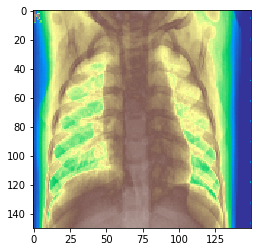

In [0]:
# original image with colormap
img_gray = imread(valid_files[10])
img_resized = resize(img_gray, dim, interpolation = INTER_AREA)
img_color =  cvtColor(applyColorMap(img_resized,  cmap('terrain')),COLOR_BGR2RGB)
    
plt.imshow(img_color)

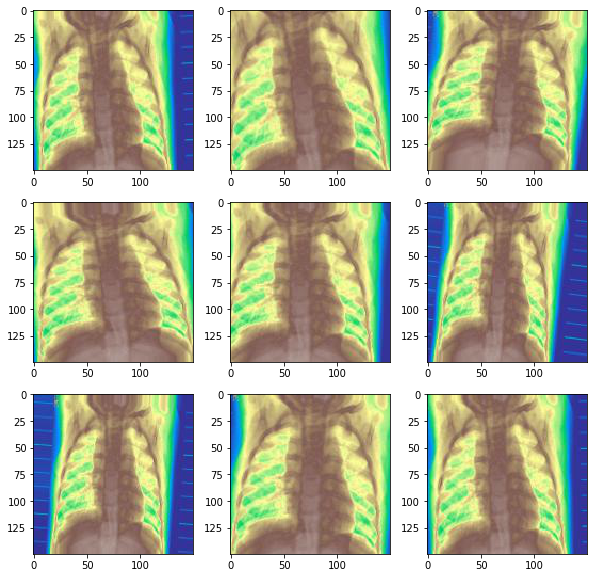

In [0]:
# augmented images
files_preview = glob(os.path.join(os.path.abspath('preview'), "*.jpeg"))

fig = plt.figure(figsize=(10,10))

for i in  range(9):  
    # a 4 rows and 4 columns  plot for the (i + 1)th element
    plt.rcParams["axes.grid"] = False 
    ax=fig.add_subplot(3, 3, i +1)
    img = imread(files_preview[i])
    img = cvtColor(img,COLOR_BGR2RGB)
    ax.imshow(img)